In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Change pandas info display option
pd.set_option("display.min_rows",500) 
pd.set_option("display.max_columns",500) 
pd.set_option("display.max_rows",500)

In [3]:
# Create dataframe from csv
loan_df = pd.read_csv("loan.csv") 

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### we have 39717 rows & 111 columns

# Data Cleaning

- Checking columns for null values

In [9]:
# Check & convert total into percentage
missing_value = np.round(loan_df.isnull().sum()/ len(loan_df) * 100)
missing_value.sort_values(ascending=False)

verification_status_joint         100.0
annual_inc_joint                  100.0
mo_sin_old_rev_tl_op              100.0
mo_sin_old_il_acct                100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0


- Drop columns with more than 30% null values

In [11]:
# List of columns with >30% nulls
columns_to_drop = list(missing_value[missing_value>=30].index)

In [12]:
# Drop the columns
loan_df = loan_df.drop(columns_to_drop,axis=1)
loan_df.shape

(39717, 53)

- Checking unique values

In [14]:
# Find & sort unique values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

#### Removing columns with only one unique value as they provide no variability for EDA.

In [16]:
columns_to_drop = [col for col in loan_df.columns if loan_df[col].nunique() == 1]
print("Dropping following columns: ", columns_to_drop)
loan_df.drop(columns=columns_to_drop, inplace=True)

Dropping following columns:  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [17]:
loan_df.shape

(39717, 44)

In [18]:
loan_df.head(25)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


- Checking for columns which might be irrelevent for EDA

In [20]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### After reviewing the data dictionary, following columns are identified for removal to streamline the analysis:
- Removing columns such as "id", "member_id", and "url" as they contain unique values for each record and provide no analytical value for EDA.
- Removing "zip_code", "last_credit_pull_d", "addr_state" since these fields don't contribute to the EDA in any meaningfull way to understanding borrower behaviour.
- Removing "funded_amnt" & "funded_amnt_inv" as they are same as "loan_amnt" and don't provide any additional insights.
- Removing "title" & "emp_title" since it has too many categorical values which will make analysis overly complicated.
- Removing "sub_grade" as using "grade" alone is good enough feature to get insights.
- Removing "out_prncp_inv" & "total_pymnt_inv" as it relates to investor-level data.
- Removing "recoveries" & "collection_recovery_fees" since these metrics are only after loans are charged off and don't help in assessing borrower behaviour before default.

In [22]:
dropping_columns = ["id", "member_id", "url", "zip_code", "last_credit_pull_d", "addr_state", "funded_amnt", "funded_amnt_inv", "title", "emp_title", 
                    "sub_grade", "out_prncp_inv", "total_pymnt_inv", "recoveries", "collection_recovery_fee"]
loan_df.drop(columns=dropping_columns, inplace=True)
loan_df.shape

(39717, 29)

#### Removing rows with loan status as "Current". For analysis, we will only consider loan fully paid or charged off

In [24]:
loan_df = loan_df[loan_df["loan_status"] != "Current"]
loan_df.shape

(38577, 29)

In [25]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

#### After a quick glance at the data dictionary, removing a few columns as they may not be relevant for risk assessment.
- "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee": Any data related to outstanding or recovered principal, interest, or late fees is irrelevant.
- "last_pymnt_d", "last_pymnt_amnt" : Data related to last payment is irrelevent as well

In [27]:
dropping_columns = ["out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "last_pymnt_d", "last_pymnt_amnt"]
loan_df.drop(columns=dropping_columns, inplace=True)
loan_df.shape

(38577, 22)

## Handiling Missing Values

In [29]:
# Checking null values from remaining columns
np.round(loan_df.isnull().sum()/ len(loan_df) * 100)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              3.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    2.0
dtype: float64

- "emp_length" & pub_rec_bankruptcies have some null values. We can try to impute missing values.

In [31]:
# Find frequent values in emp_length column
loan_df["emp_length"].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

- In emp_length column, since 10+ years value frequency is significantly higher than rest, we can impute with the same.

In [33]:
# Filling the nulls with the most frequent value
loan_df["emp_length"].fillna(loan_df["emp_length"].mode()[0], inplace = True)
np.round(loan_df.isnull().sum()/ len(loan_df) * 100)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    2.0
dtype: float64

In [34]:
# Find frequent values in pub_rec_bankruptcies column
loan_df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In pub_rec_bankruptcies column, since 0 value frequency is significantly higher than rest, we can impute with the same.

In [36]:
# Replace null values with 0
loan_df["pub_rec_bankruptcies"].fillna(0, inplace = True)
np.round(loan_df.isnull().sum()/ len(loan_df) * 100)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Convert Data

- Converting data to correct data type

In [39]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   emp_length            38577 non-null  object 
 6   home_ownership        38577 non-null  object 
 7   annual_inc            38577 non-null  float64
 8   verification_status   38577 non-null  object 
 9   issue_d               38577 non-null  object 
 10  loan_status           38577 non-null  object 
 11  purpose               38577 non-null  object 
 12  dti                   38577 non-null  float64
 13  delinq_2yrs           38577 non-null  int64  
 14  earliest_cr_line      38577 non-null  object 
 15  inq_last_6mths        38

- In "term" column, we can remove "months" and keep only the numeric value.

In [42]:
loan_df["term"] = loan_df["term"].map(lambda x : int(x.replace("months", "")))

- In "int_rate" & "revol_util" columns, we can remove "%" and keep only numeric value

In [44]:
loan_df["int_rate"] = loan_df["int_rate"].map(lambda x : float(x.split("%")[0]))

- Converting "issue_d" & "earliest_cr_line" to pd.datetime

In [46]:
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format="%b-%y")
loan_df["earliest_cr_line"] = pd.to_datetime(loan_df["earliest_cr_line"], format="%b-%y")

loan_df[["issue_d", "earliest_cr_line"]].head()

,issue_d,earliest_cr_line
0,2011-12-01,1985-01-01
1,2011-12-01,1999-04-01
2,2011-12-01,2001-11-01
3,2011-12-01,1996-02-01
5,2011-12-01,2004-11-01


In [47]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0.0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0.0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.0
5,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.0


## Outlier Check

- Removing any extreme outliers which can skew the analysis

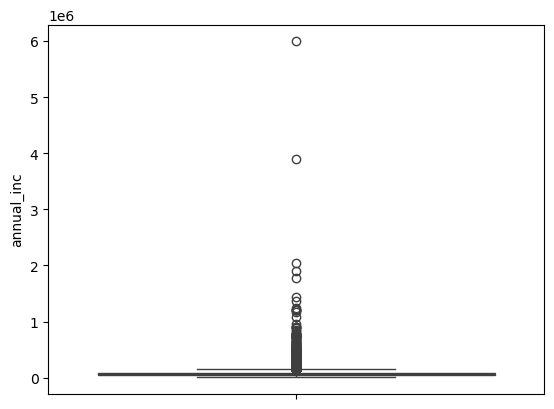

In [50]:
sns.boxplot(loan_df["annual_inc"])
plt.show()

- Here we see pretty extreme case of outliers present. We can safely remove anything over the 0.95 percentile value safely.

In [52]:
per_95_annual_inc = loan_df["annual_inc"].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

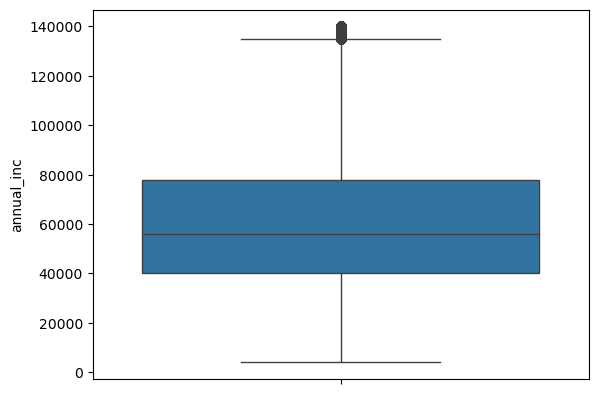

In [53]:
sns.boxplot(loan_df["annual_inc"])
plt.show()

- That looks much more reasonable now.

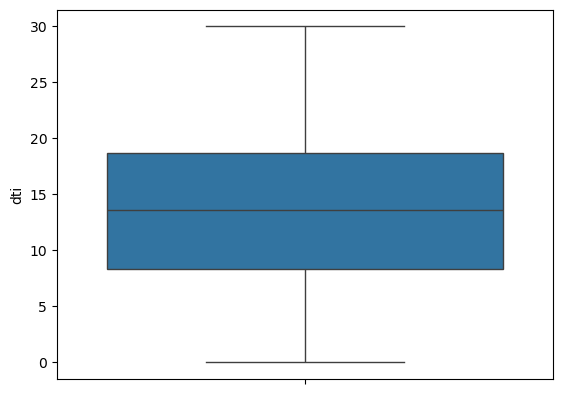

In [55]:
sns.boxplot(loan_df["dti"])
plt.show()

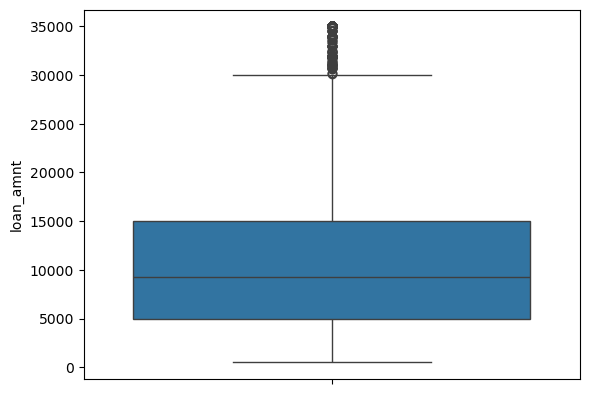

In [56]:
sns.boxplot(loan_df["loan_amnt"])
plt.show()

- In both "dti" & "loan_amnt" columns, we see few outliers but distribution look continuous so we won't need to remove outliers

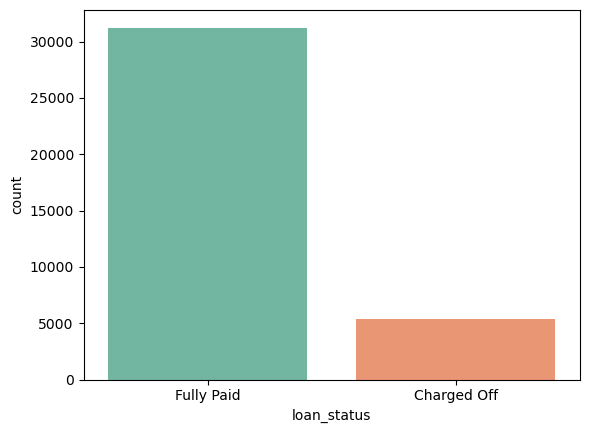

In [58]:
sns.countplot(x = "loan_status", data = loan_df, palette="Set2")
plt.show()

- Creating some derived columns for plotting. These will help us visualize the data in bins

In [60]:
# Creating bins for int_rate, open_acc, total_acc
loan_df["int_rate_groups"] = pd.cut(loan_df["int_rate"], bins=4, labels=["5%-10%", "10%-15%", "15%-20%", "20%-25%"])
loan_df["open_acc_groups"] = pd.cut(loan_df["open_acc"], bins=5, labels=["2-10", "10-20", "20-30", "30-40", "40-50"])
loan_df["total_acc_groups"] = pd.cut(loan_df["total_acc"], bins=5, labels=["2-20", "20-40", "40-60", "60-80", "80-100"])
loan_df["annual_inc_groups"] = pd.cut(loan_df["annual_inc"], bins=5, labels=["3k-30k", "30k-60k", "60k-90k", "90k-120k", "120k-140k"])

In [61]:
loan_df["loan_amnt_groups"] = pd.cut(loan_df["loan_amnt"], bins=7, labels=["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k", "30k-35k"])
loan_df["dti_groups"] = pd.cut(loan_df["dti"], bins=6, labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"])

# Univariate Analysis

- We'll be analysing only the defaulter data in univariate analysis. So creating a new dataframe with Charged of loans 

In [64]:
# New df with only the rows having "charged off" values
defaulter_df = loan_df[loan_df["loan_status"] == 'Charged Off']

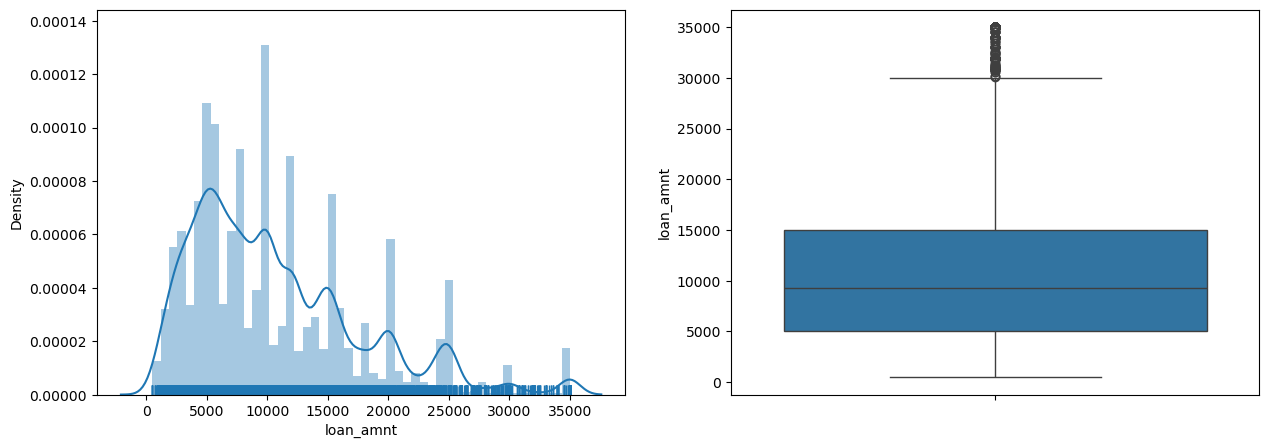

In [65]:
plt.figure(figsize=(15,5))

# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(loan_df['loan_amnt'],rug = True)

# subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(y=loan_df['loan_amnt'])

plt.show()

#### Loan amount Insight
- Plotting shows us that most of the loan amounts are in the range of 5000-15000

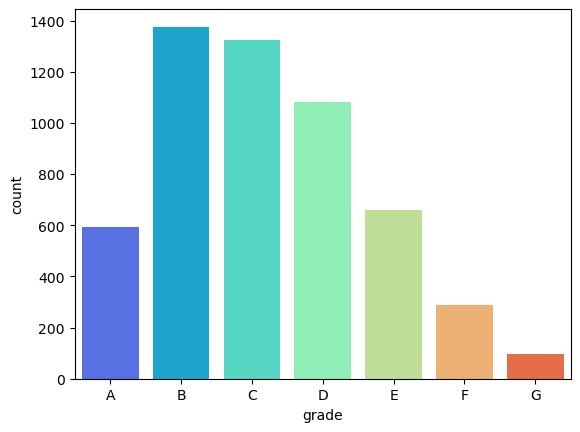

In [67]:
# Grade countplot
# Extract grades from the df to create ordered countplot
grade_list = list(defaulter_df["grade"].value_counts().index.sort_values())

sns.countplot(x = "grade", data = defaulter_df, order = grade_list, palette="rainbow")
plt.show()

#### Grade Insight
- Looks like grades B & C have the highest number of charged off loans amongst the dataset. Grade B being the highest of all

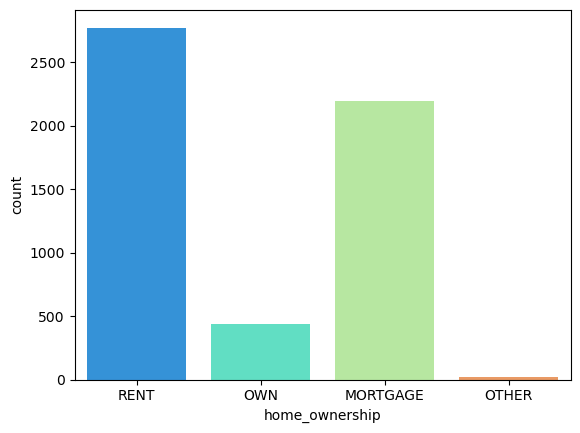

In [69]:
# Home ownership countplot
sns.countplot(x='home_ownership', data=defaulter_df, palette="rainbow")
plt.show()

#### Home ownership Insight
- People renting homes have the highest number of charged off loans

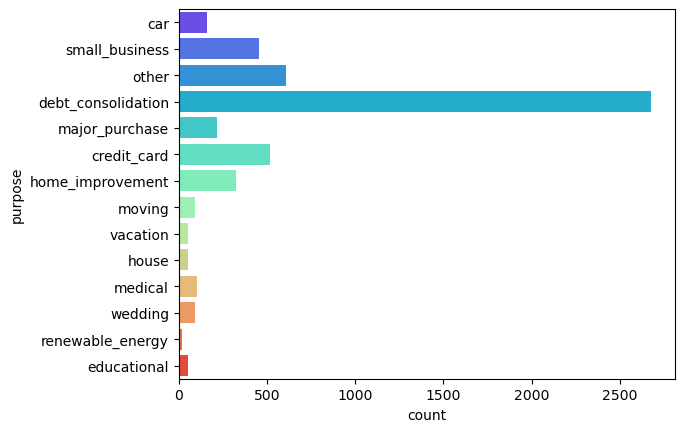

In [71]:
# Purpose countplot
sns.countplot(y ="purpose", data=defaulter_df, palette="rainbow")
plt.show()

#### Loan purpose Insight
- Significantly higher number of people are borrowing money for "debt consolidation" compared to other purposes

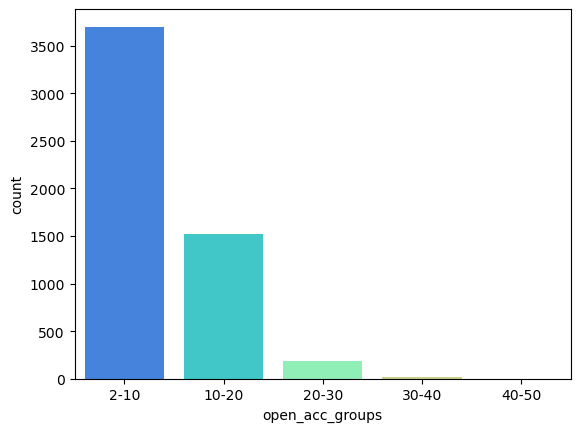

In [73]:
# Open account countplot
sns.countplot(x="open_acc_groups", data=defaulter_df, palette="rainbow")
plt.show()

#### Open Accounts Insight
- People with 2-10 open accounts are more likely be charged off

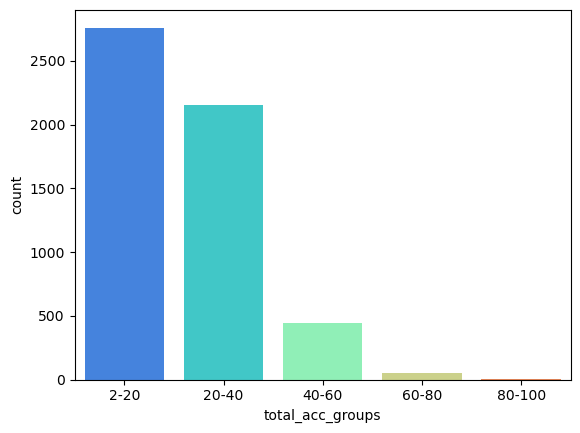

In [75]:
# Total Account countplot
sns.countplot(x="total_acc_groups", data=defaulter_df, palette="rainbow")
plt.show()

#### Total Accounts Insight
- People with 2-20 total accounts are more likely to be charged off

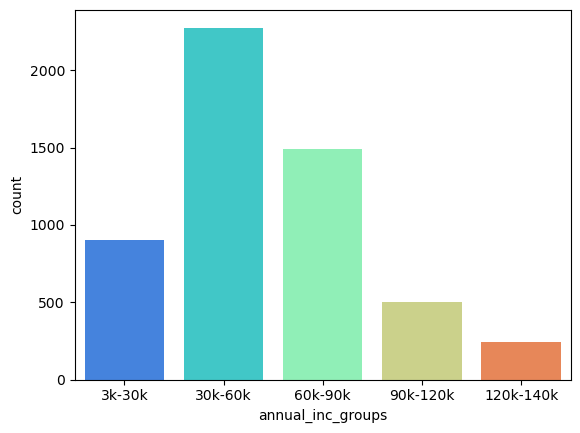

In [77]:
sns.countplot(x="annual_inc_groups", data=defaulter_df, palette="rainbow")
plt.show()

#### Annual Income Insight
- People with annual income between 30-60k seems to be having most number of dafaulters

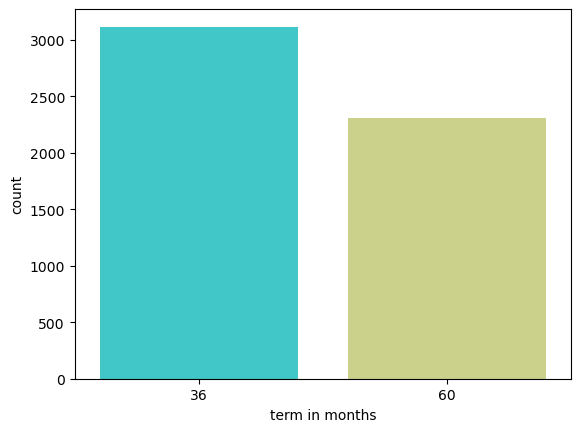

In [79]:
# Term countplot
term_plot = sns.countplot(x="term", data=defaulter_df, palette="rainbow")
term_plot.set_xlabel("term in months")
plt.show()

#### Loan term Insight
- Surprisingly people with short term loans are more likely to be charged off

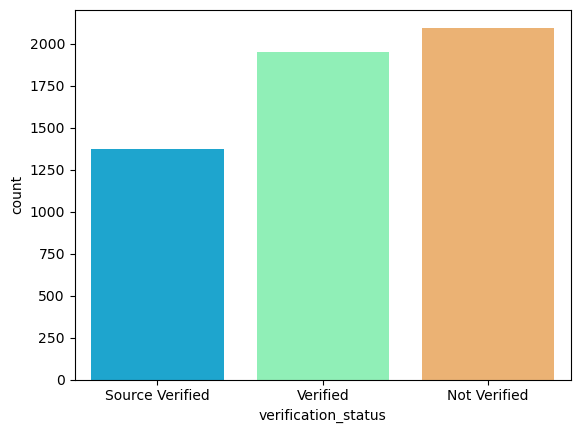

In [81]:
# verification status countplot
sns.countplot(x="verification_status", data=defaulter_df, palette="rainbow")
plt.show()

#### Income verification insight
- People whose income is not verified are charged off more than the verified ones.
- Lenders need to have strick income verification policies to reduce such applications.

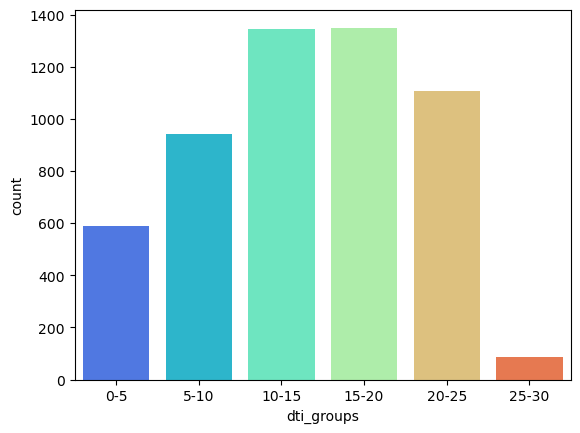

In [83]:
# dti countplot
sns.countplot(x="dti_groups", data=defaulter_df, palette="rainbow")
plt.show()

#### DTI Insights
- DTI ranging from 10-20 is the highest amongst the dataset. Such people are more likely to be charged off than rest

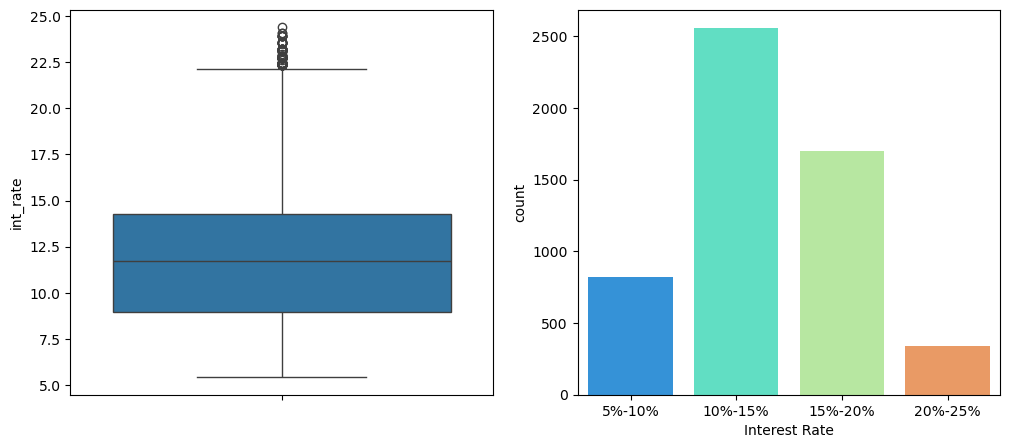

In [85]:
plt.figure(figsize=(12, 5))
# Subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(y=loan_df["int_rate"])

# Subplot 2
plt.subplot(1, 2, 2)
sns.countplot(x="int_rate_groups", data=defaulter_df, palette="rainbow")
plt.xlabel("Interest Rate")

plt.show()

#### Interest Rate Insight
- Interest rates between 10-15% seems to have highest number of charged off loans. Need to compare this with other features to get further insights

### Univariate analysis Insights on charged off dataset

- Most loan amounts fall between 5000-15000.
- **Grades B & C** have the highest charge-off rates, with Grade B leading.
- **Debt consolidation** is the most common loan purpose.
- Borrowers with **2-10 open accounts** are more likely to default.
- Borrowers with **2-20 total accounts** are more likely to default.
- People with **annual incomes between 30-60k** have the highest charge-off rates.
- **Short-term loans** have a higher default rate.
- **Unverified income borrowers** have higher charge-off rates than verified ones.
- A **DTI between 10-20** correlates with the highest charge-off rates.
- Loans with **interest rates between 10-15%** have the highest charge-off rates.

## Bivariate Analysis

#### Interest rate vs loan amount

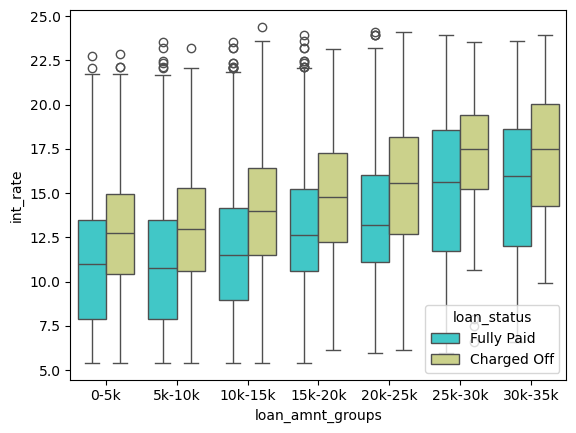

In [91]:
# Comparing interest rate with loan amount
sns.boxplot(y="int_rate", x="loan_amnt_groups", data =loan_df, hue ="loan_status", palette="rainbow")
plt.show()

- Interst rate on charged off loans is consistently higher than on fully paid loans

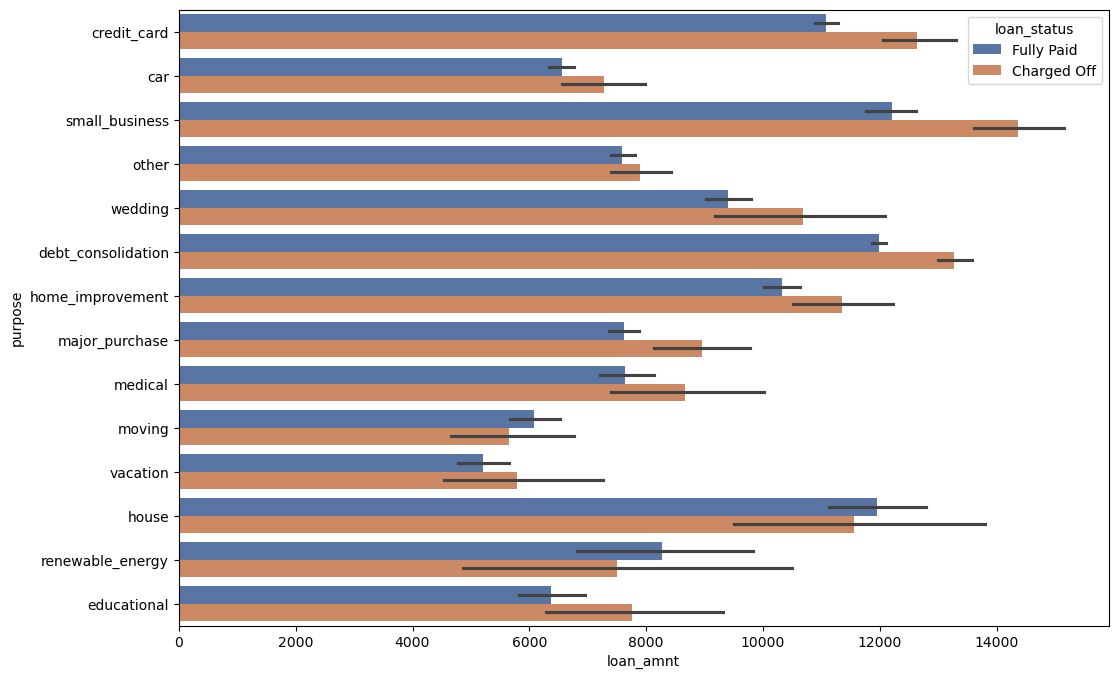

In [93]:
# Purpose vs loan amount
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x="loan_amnt", y="purpose", hue ="loan_status",palette="deep")
plt.show()

- Comparing purpose with loan amounts tell us that small businesses tend to have high risk as they have higher default rates along with higher loan amounts.
- This overturns our initial assumption of debt_consolidation being the highest defaulter purpose.

#### Purpose vs Loan Amount

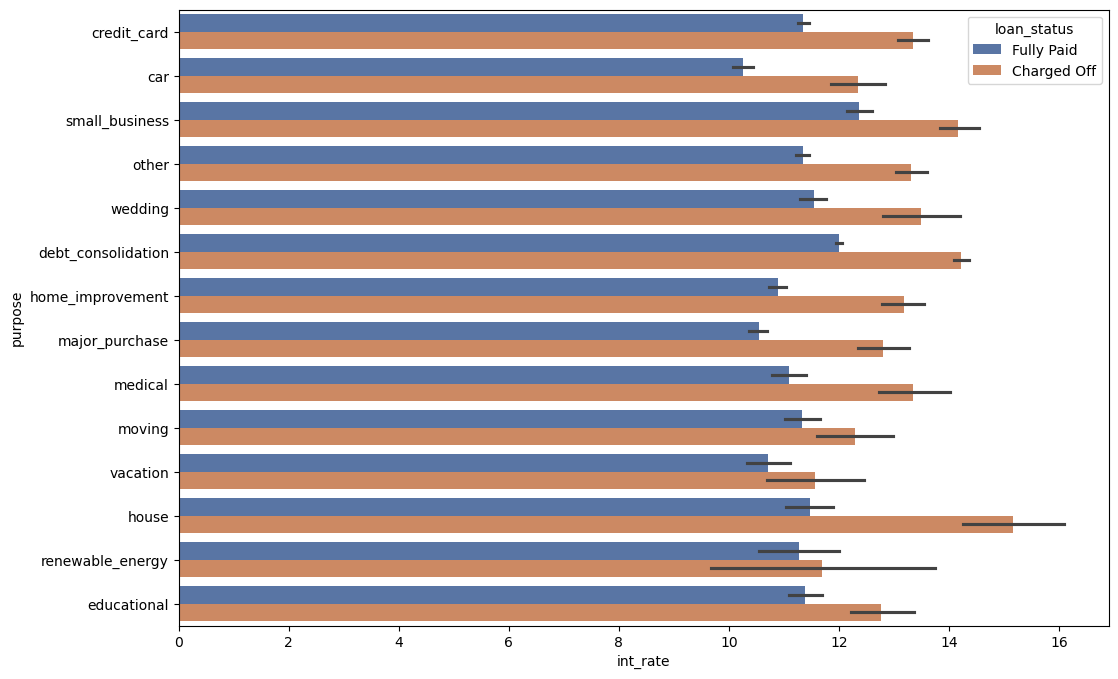

In [96]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x="int_rate", y="purpose", hue ="loan_status",palette="deep")
plt.show()

- Interst rate compared with purpose shows pretty even distribution. Everywhere the defaulters are higher.

#### Purpose vs annual income

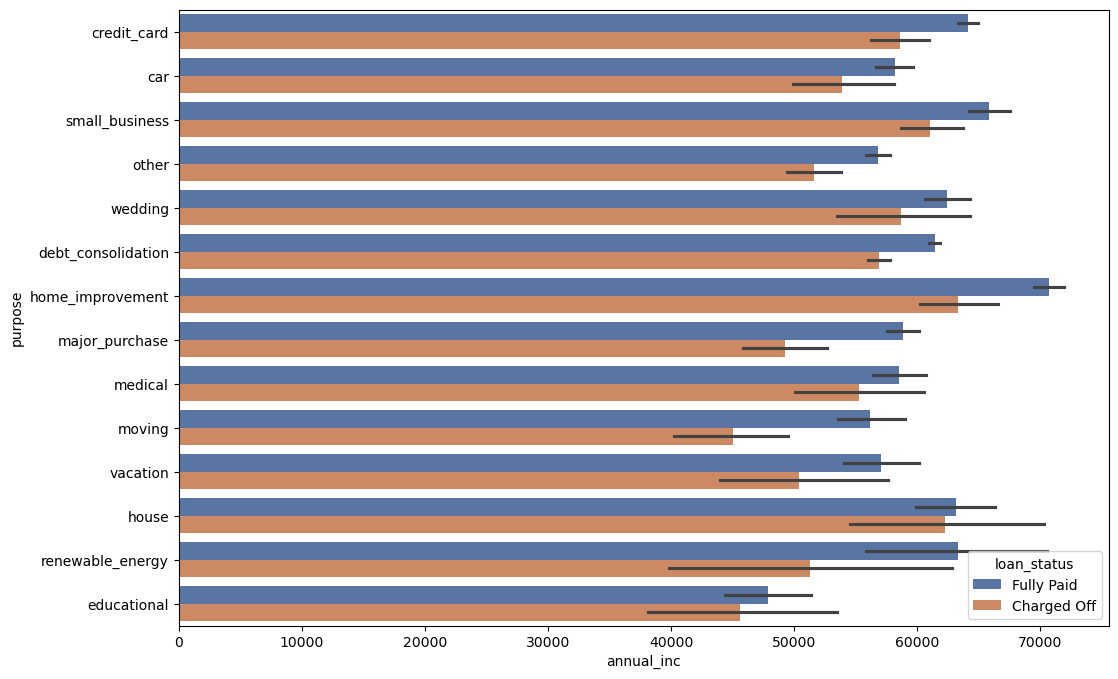

In [99]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x="annual_inc", y="purpose", hue ="loan_status",palette="deep")
plt.show()

- Annual income is generally lower in all categories for the charge off loans

#### Interest rate vs annual income

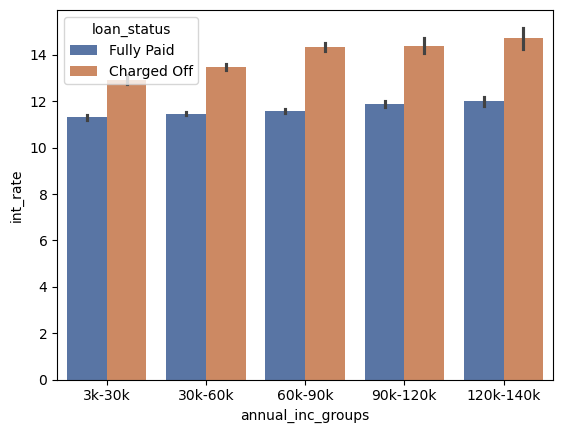

In [102]:
sns.barplot(data =loan_df,x="annual_inc_groups", y="int_rate", hue ="loan_status",palette="deep")
plt.show()

- Distribution seems pretty even across all bins

#### Annual income vs loan_amount

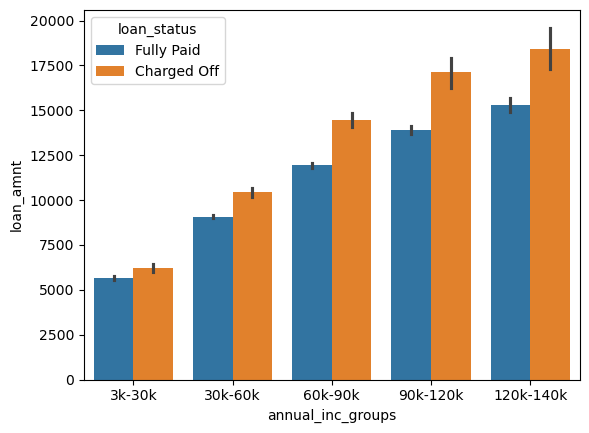

In [105]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = "loan_status", data = loan_df)
plt.show()

- As annual income is increasing, loan amount is also increasing. Making it riskier as defaulter loan amount is also high
- Also across all income groups, loan amount is higher for defaulters

#### term vs loan amount

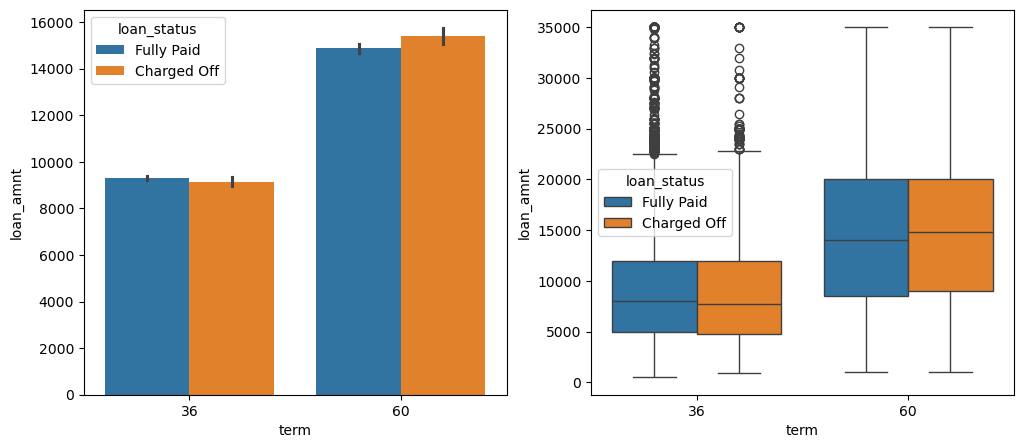

In [108]:
plt.figure(figsize=(12, 5))
# Subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x="term", y="loan_amnt", hue="loan_status", data=loan_df)

#Subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(x="term", y="loan_amnt", hue="loan_status", data=loan_df)

plt.show()

- Loans with 60 month term have higher average loan amount than 36 month. Which makes it more risky.
- But applicants who fully paid vs charged off have no significant difference in loan amounts

#### Verification vs loan amount Insight

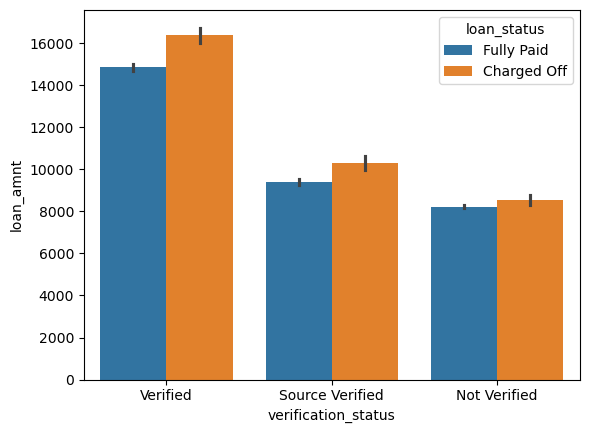

In [111]:
sns.barplot(x="verification_status", y="loan_amnt", hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()

- Even though not verified had higher number of defaulters, it is clear here that avergae loan amount is higher from verified people. This shows strong indication of loans being approved with loose verification methods.

#### dti vs loan amount & dti vs interest rate

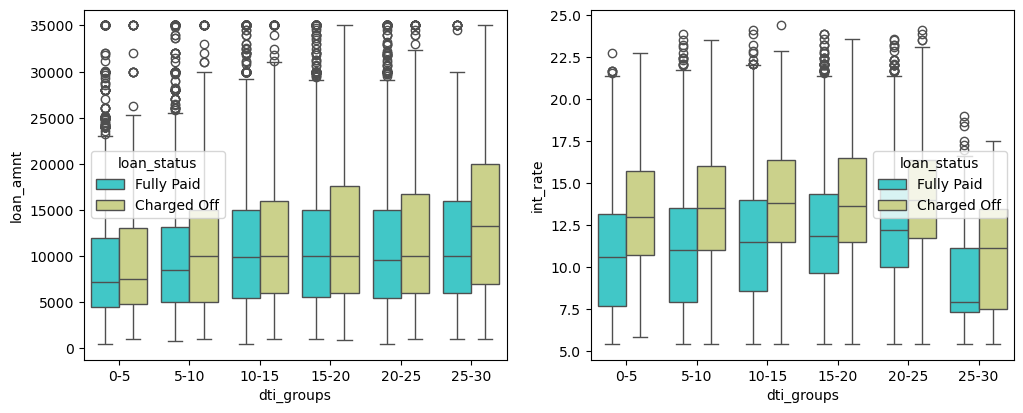

In [114]:
plt.figure(figsize=(12, 10))
# Subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(y="loan_amnt", x="dti_groups", data =loan_df, hue="loan_status", palette="rainbow")

# Subplot 2
plt.subplot(2, 2, 2)
sns.boxplot(y="int_rate", x="dti_groups", data =loan_df, hue="loan_status", palette="rainbow")

plt.show()

- Charged off loans are with higher amount compared with paid off loans

#### grade vs loan amount, interst rate, annual income

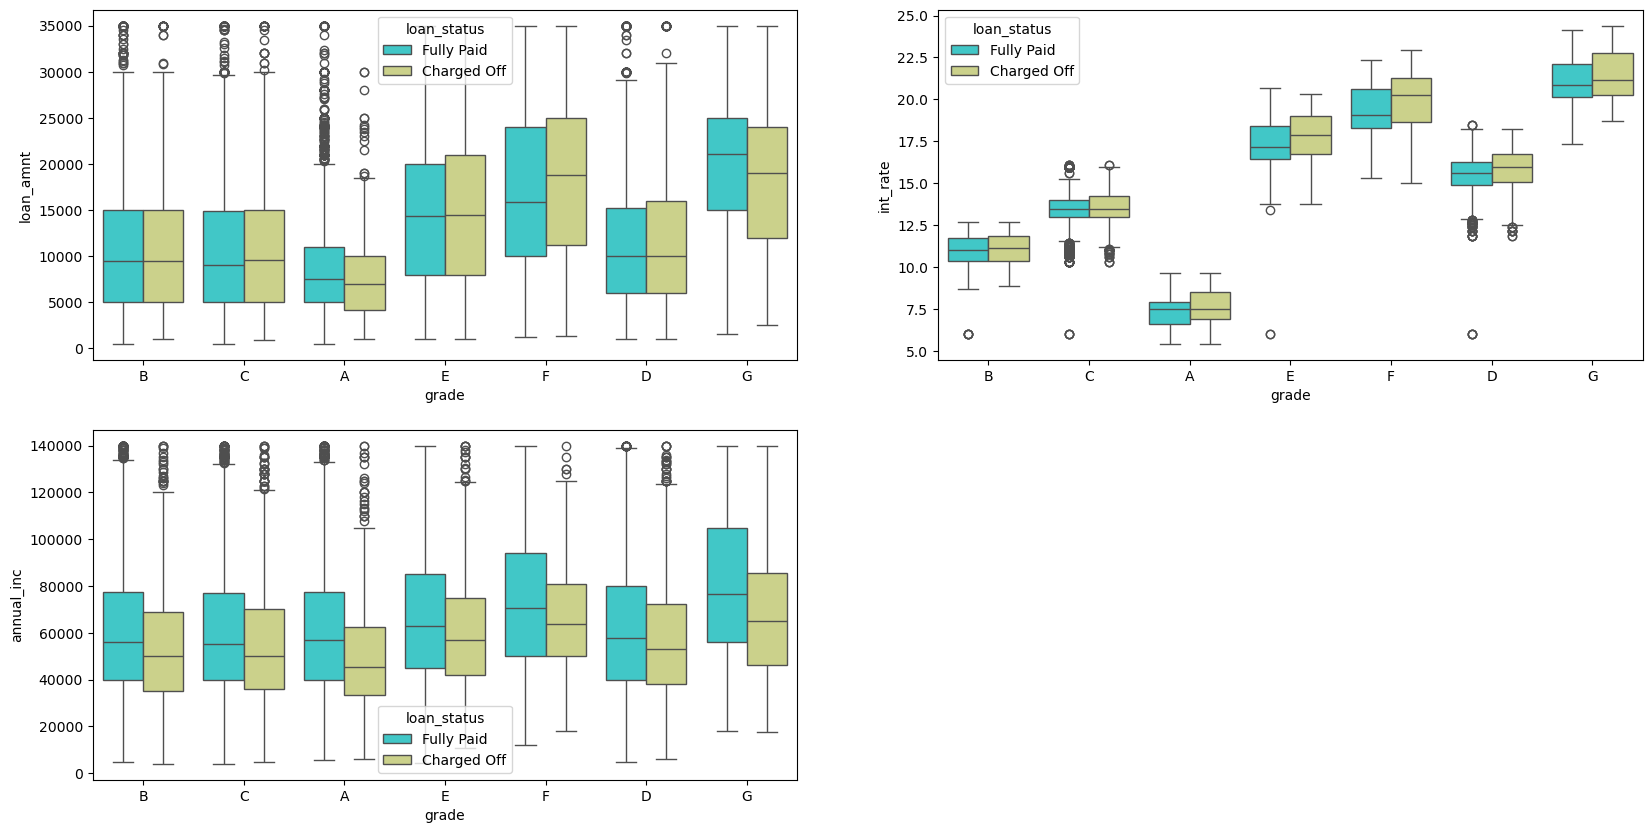

In [117]:
plt.figure(figsize=(20,10))
# Subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(y="loan_amnt", x="grade", data =loan_df, hue="loan_status", palette="rainbow")

# Subplot 1
plt.subplot(2, 2, 2)
sns.boxplot(y="int_rate", x="grade", data =loan_df, hue="loan_status", palette="rainbow")

# Subplot 1
plt.subplot(2, 2, 3)
sns.boxplot(y="annual_inc", x="grade", data =loan_df, hue="loan_status", palette="rainbow")

plt.show()

- Higher grades like G tend to have larger loan amounts, and these loans are more likely to be charged off.
- Interest rates increase with grades from A to G, with higher grades showing more risk of charge-offs.
- Borrowers with higher grades (e.g., F, G) have lower annual incomes, correlating with a higher likelihood of loan defaults.

#### Home ownership vs loan amount

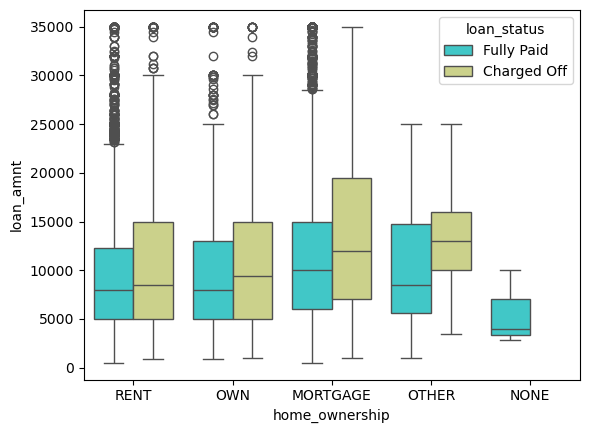

In [120]:
sns.boxplot(y="loan_amnt", x="home_ownership", data =loan_df, hue="loan_status", palette="rainbow")
plt.show()

- Borrowers with "MORTGAGE" tend to take larger loans, and the risk of charge-offs increases with the loan amount.

#### Open account vs Loan Amount

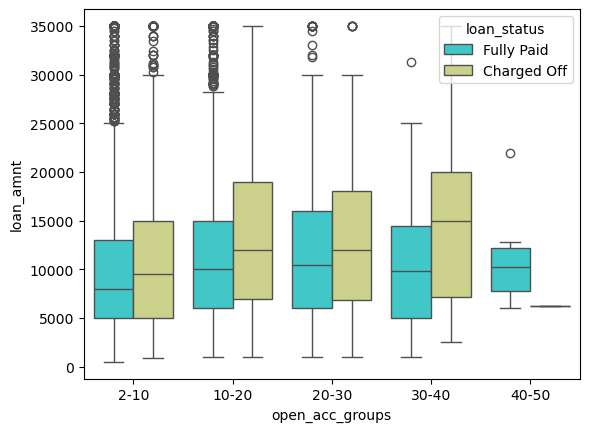

In [123]:
sns.boxplot(y="loan_amnt", x="open_acc_groups", data =loan_df, hue="loan_status", palette="rainbow")
plt.show()

- Borrowers with 10-40 account are taking larger loans which in turn have higher risk of charge-offs

#### Total account vs loan amount

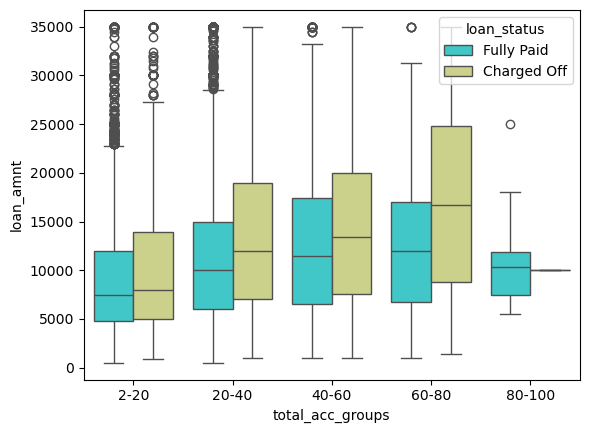

In [126]:
sns.boxplot(y="loan_amnt", x="total_acc_groups", data =loan_df, hue="loan_status", palette="rainbow")
plt.show()

- Borrowers with 60-80 total accounts are taking larger loans & has higher risk of charge-offs as well.

### Bivariate Insights

- Interest rates on charged-off loans are consistently higher than on fully paid loans, indicating higher risk.
- Small businesses have higher default rates and larger loan amounts, making them higher risk than other loan purposes.
- Charged-off loans generally have lower annual incomes, indicating higher risk among lower-income borrowers.
- Loan amounts increase with annual income, making higher-income loans riskier due to larger potential defaults.
- Loans with a 60-month term tend to have higher average loan amounts, increasing risk.
- Verified income loans have higher average loan amounts, suggesting potential risk from loose verification methods.
- Charged-off loans are typically larger than fully paid loans, indicating higher risk with larger loan amounts.
- Higher grades like G have larger loan amounts and higher charge-off risk, indicating greater risk in higher-grade loans.
- Interest rates increase with grades from A to G, showing higher risk of charge-offs with higher grades.
- Borrowers with higher grades (F, G) tend to have lower annual incomes, correlating with higher default risk.
- Borrowers with "MORTGAGE" loans tend to take larger loans, with increased charge-off risk as loan amounts grow.
- Borrowers with 10-40 accounts tend to take larger loans, increasing the risk of charge-offs.
- Borrowers with 60-80 total accounts take larger loans, correlating with higher charge-off risk.

## Multivariate analysis

##### Heatmap

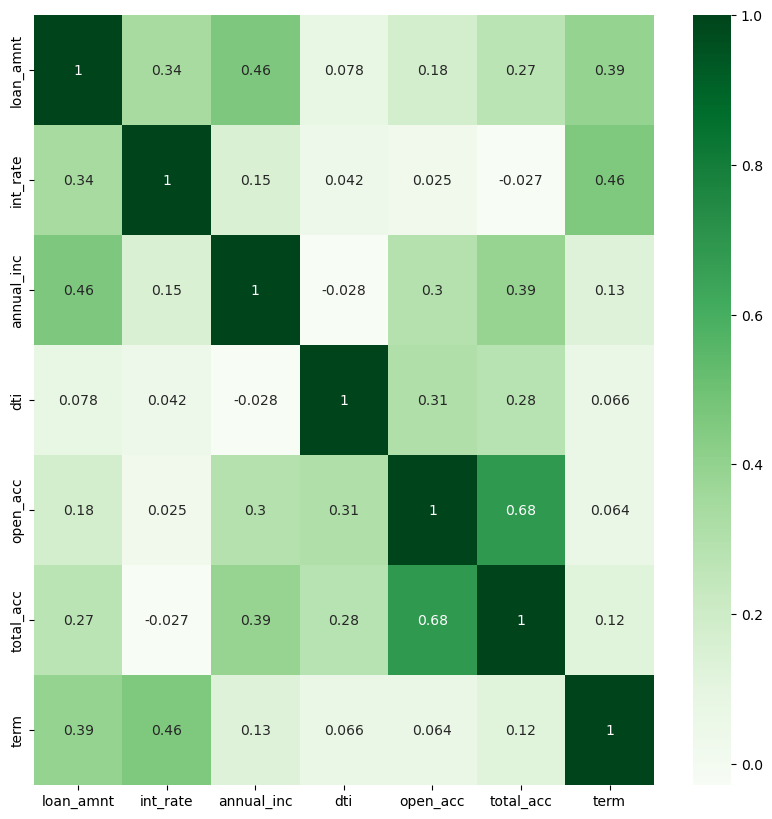

In [132]:
plt.figure(figsize=(10,10))
# List of variable to plot on
cont_var= ["loan_amnt", "int_rate", "annual_inc",
       "dti", "open_acc", "total_acc", "term"]

# Calculate correlation
corr = defaulter_df[cont_var].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="Greens")

plt.show()

- High DTI and a large number of open accounts might be associated with a higher risk of default.
- Borrowers with higher incomes tend to get larger loans and have more accounts.
- Larger loans often have higher interest rates and longer terms.

### Pairplot

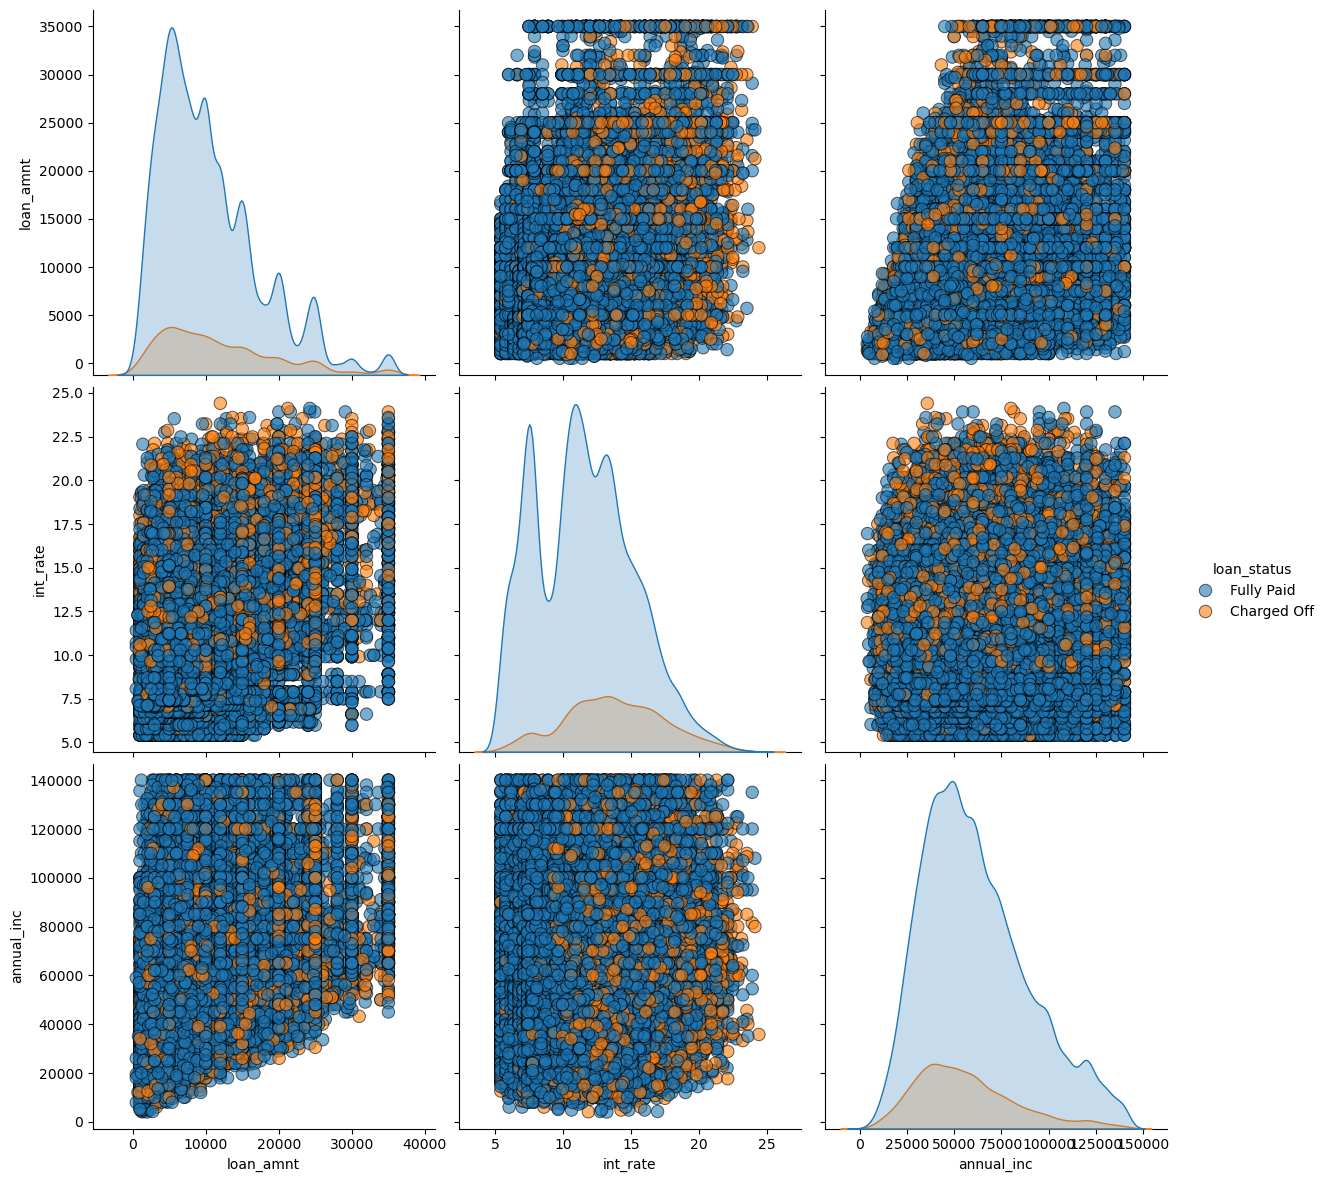

In [135]:
# List of variable to plot on
cont_var= ["loan_amnt", "int_rate", "annual_inc", "loan_status"]

# New dataframe to plot
pplot_df = loan_df[cont_var]

# Plotting pairplot
sns.pairplot(pplot_df, hue = "loan_status", diag_kind = "kde",
             plot_kws = {"alpha": 0.6, "s": 80, "edgecolor": "k"},
             size = 4)
plt.show()

- Higher interest rates are showing higher charged off.
- Interest rate increasing with loan amount is resulting in high charged off.

# Final Insights based on all data

- **High Interest Rates Correlate with Higher Charge-Off Risk:** Loans with higher interest rates, especially in the 10-15% range, show significantly higher charge off rates, indicating a greater lending risk.
- **Large Loan Amounts and Longer Terms Increase Risk:** Larger loans, often with longer terms (e.g., 60 months), have higher default rates due to increased exposure and potentially higher interest rates.
- **High DTI and More Open Accounts are Associated with Higher Default Risk:** Borrowers with high DTI (10-20) and a large number of open accounts (2-20) tend to default more frequently, highlighting the need for careful assessment of financial behavior.
- **Income Verification Plays a Key Role:** Unverified income loans have higher charge off rates, but verified income loans have larger loan amounts, suggesting potential issues with verification methods.
- **Loan Purpose and Borrower Profile Impact Default Rates:** Small businesses and borrowers with higher-grade loans (e.g., Grade B & C) and larger loan amounts are at higher risk of default, while debt consolidation, although common, does not have the highest charge off rate.

# Solutions to reduce Lending Risk:
- **Adjust Interest Rates:** Offer tiered rates based on risk profiles; avoid excessively high rates.
- **Limit Loan Amounts and Terms:** Cap loans for high-risk borrowers and prefer shorter terms.
- **Strict DTI and Account Limits:** Set stricter DTI and account limits for eligibility.
- **Better Income Verification:** Use robust income checks (pay stubs, tax returns) and automate processes.
- **Reevaluate Loan Purposes:** Scrutinize small business loans and adjust for higher-risk categories.
- **Assess Purpose Carefully:** Set stricter criteria small business, debt consolidation loans.